In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
df=pd.read_csv("dataset_comunidades_senasoft.csv")
df.head()

,ID,Nombre,Edad,Género,Ciudad,Comentario,Categoría del problema,Nivel de urgencia,Fecha del reporte,Acceso a internet,Atención previa del gobierno,Zona rural
0,1,Jorge,23.0,Otro,Manizales,las calles están muy oscuras y peligrosas.,Salud,Urgente,2023-08-11,0,1,0
1,2,Camilo,40.0,Otro,Santa Marta,no tenemos centros culturales ni bibliotecas.,Medio Ambiente,No urgente,2023-04-12,1,1,1
2,3,Pedro,35.0,Otro,Medellín,las basuras no se recogen a tiempo.,Medio Ambiente,No urgente,2023-06-09,1,1,0
3,4,Ana,NaN,F,Bogotá,la contaminación del río está aumentando.,Seguridad,No urgente,2023-06-04,0,1,1
4,5,Jorge,62.0,M,Manizales,no hay suficientes escuelas públicas.,Seguridad,Urgente,2024-07-10,1,0,1


In [47]:
df.columns


Index(['ID', 'Nombre', 'Edad', 'Género', 'Ciudad', 'Comentario',
       'Categoría del problema', 'Nivel de urgencia', 'Fecha del reporte',
       'Acceso a internet', 'Atención previa del gobierno', 'Zona rural'],
      dtype='object')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10000 non-null  int64  
 1   Nombre                        10000 non-null  object 
 2   Edad                          9325 non-null   float64
 3   Género                        9539 non-null   object 
 4   Ciudad                        9864 non-null   object 
 5   Comentario                    9362 non-null   object 
 6   Categoría del problema        10000 non-null  object 
 7   Nivel de urgencia             10000 non-null  object 
 8   Fecha del reporte             10000 non-null  object 
 9   Acceso a internet             10000 non-null  int64  
 10  Atención previa del gobierno  10000 non-null  int64  
 11  Zona rural                    10000 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 937.6+ KB


In [49]:
df.describe()

,ID,Edad,Acceso a internet,Atención previa del gobierno,Zona rural
count,10000.00000,9325.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,47.482895,0.510200,0.494800,0.492800
std,2886.89568,19.142348,0.499921,0.499998,0.499973
min,1.00000,15.000000,0.000000,0.000000,0.000000
25%,2500.75000,31.000000,0.000000,0.000000,0.000000
50%,5000.50000,48.000000,1.000000,0.000000,0.000000
75%,7500.25000,64.000000,1.000000,1.000000,1.000000
max,10000.00000,80.000000,1.000000,1.000000,1.000000


In [50]:
df["Categoría del problema"].unique()

array(['Salud', 'Medio Ambiente', 'Seguridad', 'Educación'], dtype=object)

In [51]:
df["Ciudad"].unique()

array(['Manizales', 'Santa Marta', 'Medellín', 'Bogotá', 'Cartagena',
       'Cali', 'Barranquilla', 'Pereira', 'Cúcuta', 'Bucaramanga', nan],
      dtype=object)

In [52]:
df["Comentario"].unique()

array(['las calles están muy oscuras y peligrosas.',
       'no tenemos centros culturales ni bibliotecas.',
       'las basuras no se recogen a tiempo.',
       'la contaminación del río está aumentando.',
       'no hay suficientes escuelas públicas.',
       'hay problemas con la recolección de basura.',
       'necesitamos más acceso a internet en la zona.',
       'faltan médicos en el centro de salud.',
       'falta agua potable en varias casas.', nan,
       'queremos más presencia policial.'], dtype=object)

In [53]:
# df = df.dropna(subset=['Ciudad'])
df.isnull().sum()

ID                                0
Nombre                            0
Edad                            675
Género                          461
Ciudad                          136
Comentario                      638
Categoría del problema            0
Nivel de urgencia                 0
Fecha del reporte                 0
Acceso a internet                 0
Atención previa del gobierno      0
Zona rural                        0
dtype: int64

In [54]:
df.sample(5)

,ID,Nombre,Edad,Género,Ciudad,Comentario,Categoría del problema,Nivel de urgencia,Fecha del reporte,Acceso a internet,Atención previa del gobierno,Zona rural
467,468,Camilo,41.0,Otro,Santa Marta,las calles están muy oscuras y peligrosas.,Seguridad,No urgente,2024-04-25,1,1,0
3645,3646,Ana,50.0,F,Santa Marta,NaN,Salud,Urgente,2023-07-06,0,0,1
553,554,Pedro,63.0,F,Cúcuta,las basuras no se recogen a tiempo.,Salud,No urgente,2023-02-14,0,1,1
5192,5193,Pedro,NaN,M,Cartagena,queremos más presencia policial.,Medio Ambiente,No urgente,2023-04-16,1,0,1
3818,3819,Jorge,78.0,Otro,Pereira,las basuras no se recogen a tiempo.,Educación,Urgente,2023-02-17,1,1,0


In [55]:
# Diccionario inverso: comentario → categoría correcta
categoria_por_comentario = {
    "faltan médicos en el centro de salud.": "Salud",
    "falta agua potable en varias casas.": "Salud",
    "no hay suficientes escuelas públicas.": "Educación",
    "no tenemos centros culturales ni bibliotecas.": "Educación",
    "necesitamos más acceso a internet en la zona.": "Educación",
    "las calles están muy oscuras y peligrosas.": "Seguridad",
    "queremos más presencia policial.": "Seguridad",
    "las basuras no se recogen a tiempo.": "Medio Ambiente",
    "la contaminación del río está aumentando.": "Medio Ambiente",
    "hay problemas con la recolección de basura.": "Medio Ambiente"
}

# Función de reasignación de categoría según comentario
def asignar_categoria(comentario):
    return categoria_por_comentario.get(comentario, np.nan)

# Aplicar la reasignación con .loc
df.loc[:, "Categoría del problema"] = df["Comentario"].apply(asignar_categoria)

# Convertir a string nativo (por claridad)
df.loc[:, "Categoría del problema"] = df["Categoría del problema"].astype("string")


In [56]:
df = df.dropna(subset=["Categoría del problema"])

In [57]:
df["Comentario"].unique()

array(['las calles están muy oscuras y peligrosas.',
       'no tenemos centros culturales ni bibliotecas.',
       'las basuras no se recogen a tiempo.',
       'la contaminación del río está aumentando.',
       'no hay suficientes escuelas públicas.',
       'hay problemas con la recolección de basura.',
       'necesitamos más acceso a internet en la zona.',
       'faltan médicos en el centro de salud.',
       'falta agua potable en varias casas.',
       'queremos más presencia policial.'], dtype=object)

In [58]:
df = df.drop(columns=['Edad', 'Nombre','Género'], errors='ignore')
df['Fecha del reporte'] = pd.to_datetime(df['Fecha del reporte'], errors='coerce')
df.head()

,ID,Ciudad,Comentario,Categoría del problema,Nivel de urgencia,Fecha del reporte,Acceso a internet,Atención previa del gobierno,Zona rural
0,1,Manizales,las calles están muy oscuras y peligrosas.,Seguridad,Urgente,2023-08-11,0,1,0
1,2,Santa Marta,no tenemos centros culturales ni bibliotecas.,Educación,No urgente,2023-04-12,1,1,1
2,3,Medellín,las basuras no se recogen a tiempo.,Medio Ambiente,No urgente,2023-06-09,1,1,0
3,4,Bogotá,la contaminación del río está aumentando.,Medio Ambiente,No urgente,2023-06-04,0,1,1
4,5,Manizales,no hay suficientes escuelas públicas.,Educación,Urgente,2024-07-10,1,0,1


In [59]:
def extraer_por_columna(df, columna):
    """Devuelve las filas donde la columna indicada tiene valor 1."""
    return df[df[columna] == 'Urgente']


In [60]:
acce_df = extraer_por_columna(df, "Nivel de urgencia")
print(acce_df)


         ID     Ciudad                                     Comentario  \
0         1  Manizales     las calles están muy oscuras y peligrosas.   
4         5  Manizales          no hay suficientes escuelas públicas.   
7         8     Bogotá          no hay suficientes escuelas públicas.   
10       11     Bogotá            falta agua potable en varias casas.   
11       12  Manizales      la contaminación del río está aumentando.   
...     ...        ...                                            ...   
9986   9987     Cúcuta     las calles están muy oscuras y peligrosas.   
9991   9992    Pereira    hay problemas con la recolección de basura.   
9994   9995  Manizales          faltan médicos en el centro de salud.   
9996   9997     Cúcuta    hay problemas con la recolección de basura.   
9999  10000    Pereira  necesitamos más acceso a internet en la zona.   

     Categoría del problema Nivel de urgencia Fecha del reporte  \
0                 Seguridad           Urgente        202

In [61]:
df = df.dropna(subset=["Categoría del problema"])

In [63]:
df_u = df[["Comentario", "Categoría del problema"]]
df_u.head()

,Comentario,Categoría del problema
0,las calles están muy oscuras y peligrosas.,Seguridad
1,no tenemos centros culturales ni bibliotecas.,Educación
2,las basuras no se recogen a tiempo.,Medio Ambiente
3,la contaminación del río está aumentando.,Medio Ambiente
4,no hay suficientes escuelas públicas.,Educación


In [68]:
import re

def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r'[^a-záéíóúñü\s]', '', texto)
    return texto

df_u["Comentario_limpio"] = df_u["Comentario"].apply(limpiar_texto)

C:\Users\SENA.MOSAPRCBAFSP147\AppData\Local\Temp\ipykernel_11144\647722170.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_u["Comentario_limpio"] = df_u["Comentario"].apply(limpiar_texto)


In [69]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(
    df_u["Comentario_limpio"], 
    df_u["Categoría del problema"], 
    test_size=0.2, 
    random_state=42
)

vectorizador = TfidfVectorizer(max_features=1000)
X_train_vec = vectorizador.fit_transform(X_train)
X_test_vec = vectorizador.transform(X_test)


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(
    df_u["Comentario_limpio"], 
    df_u["Categoría del problema"], 
    test_size=0.2, 
    random_state=42
)

vectorizador = TfidfVectorizer(max_features=1000)
X_train_vec = vectorizador.fit_transform(X_train)
X_test_vec = vectorizador.transform(X_test)


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

modelo = LogisticRegression(max_iter=200)
modelo.fit(X_train_vec, y_train)

# Predicciones
y_pred = modelo.predict(X_test_vec)
print(classification_report(y_test, y_pred))


                precision    recall  f1-score   support

     Educación       1.00      1.00      1.00       562
Medio Ambiente       1.00      1.00      1.00       572
         Salud       1.00      1.00      1.00       369
     Seguridad       1.00      1.00      1.00       370

      accuracy                           1.00      1873
     macro avg       1.00      1.00      1.00      1873
  weighted avg       1.00      1.00      1.00      1873



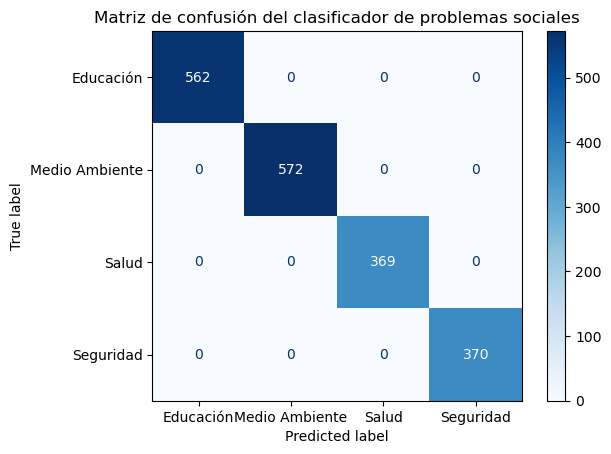

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(modelo, X_test_vec, y_test, cmap="Blues")
plt.title("Matriz de confusión del clasificador de problemas sociales")
plt.show()
